# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('CA_housing.csv')
dataset = dataset.dropna(axis=0)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = pd.concat([dataset.iloc[:, :-2], dataset.iloc[:, -1]], axis=1).values
X = np.array(ct.fit_transform(X))
y = dataset.iloc[:, -2:-1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [4]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=20, random_state=0)

## Predicting a new result

In [5]:
regressor.predict([[0.0, 1.0, 0.0, 0.0, 0.0, -121.24, 39.37, 16.0, 2785.0, 616.0,
       1387.0, 530.0, 2.3886]])

array([92325.])

In [6]:
y[-1]

array([89400.])

## Visualising the Random Forest Regression results (higher resolution)

In [7]:
# X_grid = np.arange(min(X), max(X), 0.01)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X, y, color = 'red')
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
# plt.title('Truth or Bluff (Random Forest Regression)')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()

In [8]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[121990.  98900.]
 [156210. 153000.]
 [106680.  91300.]
 ...
 [124770. 127000.]
 [181575. 158600.]
 [194130. 175000.]]


In [9]:
df = pd.DataFrame(data=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), columns=['Predicted ($)', 'Actual ($)'])
df

Predicted ($)  Actual ($)
0          121990.0     98900.0
1          156210.0    153000.0
2          106680.0     91300.0
3          374615.1    345200.0
4          347285.0    344100.0
...             ...         ...
4082       111065.0     76300.0
4083       228970.0    261600.0
4084       124770.0    127000.0
4085       181575.0    158600.0
4086       194130.0    175000.0

[4087 rows x 2 columns]

In [10]:
import dataframe_image as dfi
dfi.export(df, 'act_pred_rfr.png', max_rows=5)

In [11]:
px = np.linspace(0, max(y_test), int(max(y_test)))
py = np.linspace(0, max(y_test), int(max(y_test)))

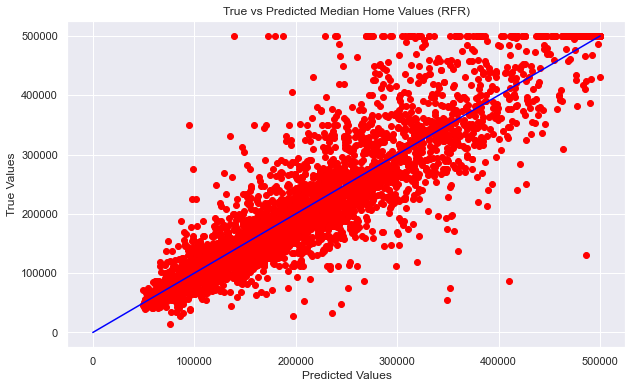

In [12]:
plt.figure(figsize=(10,6))
import seaborn as sns
sns.set()
plt.scatter(y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1), color = 'red')
plt.plot(px, py, color='blue')
plt.title('True vs Predicted Median Home Values (RFR)')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()
# plt.savefig('act_pred_svr_scatter.png')

In [16]:
from sklearn.metrics import r2_score
print('R2: ', r2_score(y_test, y_pred))
print('Adjusted R2: ', 1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

R2:  0.8101110896788031
Adjusted R2:  0.8095050116443873


In [15]:
from sklearn.metrics import mean_squared_error
import math
mean_squared_error(y_test, y_pred, squared=False)

50423.73340009929